Dicionario

1. educ_pai/educ_mae
Até que série seu pai/ mae, ou o homem responsável por você, estudou?	
    A	Nunca estudou.
	B	Não completou a 4ª série/5º ano do Ensino Fundamental.
	C	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
	D	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
	E	Completou o Ensino Médio, mas não completou a Faculdade.
	F	Completou a Faculdade, mas não completou a Pós-graduação.
	G	Completou a Pós-graduação.
	H	Não sei.

2. renda_fam
Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)	
    A	Nenhuma renda.
	B	Até R$ 937,00.
	C	De R$ 937,01 até R$ 1.405,50.
	D	De R$ 1.405,51 até R$ 1.874,00.
	E	De R$ 1.874,01 até R$ 2.342,50.
	F	De R$ 2.342,51 até R$ 2.811,00.
	G	De R$ 2.811,01 até R$ 3.748,00.
	H	De R$ 3.748,01 até R$ 4.685,00.
	I	De R$ 4.685,01 até R$ 5.622,00.
	J	De R$ 5.622,01 até R$ 6.559,00.
	K	De R$ 6.559,01 até R$ 7.496,00.
	L	De R$ 7.496,01 até R$ 8.433,00.
	M	De R$ 8.433,01 até R$ 9.370,00.
	N	De R$ 9.370,01 até R$ 11.244,00.
	O	De R$ 11.244,01 até R$ 14.055,00.
	P	De R$ 14.055,01 até R$ 18.740,00.
	Q	Mais de R$ 18.740,00.


3. n_pessoas_fam
Número de pessoas na familia

In [1]:
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea


%matplotlib inline
df = pd.read_stata('base_de_dados_ExerciocioI (1).dta')

df_enem = pd.DataFrame(df['nota_enem'])
enem_describe = df_enem.describe()



1. Apresente uma tabela com as estatísticas descritivas (média e desvio-padrão)

In [2]:
enem_describe


,nota_enem
count,100000.000000
mean,520.608032
std,79.858727
min,154.919998
25%,467.760010
50%,515.320007
75%,569.840027
max,818.140015


2. Apresente gráficos de densidade comparando o desempenho no ENEM dos seguintes grupos:
-- homens e mulheres, escolas publicas e privadas, pretos e brancos, pais educados e pais não educados1.

In [3]:
df.head()

,ano,co_municipio_residencia,co_uf_residencia,sg_uf_residencia,idade,n_pessoas_fam,feminino,preto,branco,publico,privada,nota_enem,educ_pai,educ_mae,renda_fam
0,2017,3105905,31,MG,50.0,5,1,0,0,NaN,NaN,542.419983,C,B,B
1,2017,4109708,41,PR,17.0,4,1,0,1,NaN,NaN,540.119995,F,D,E
2,2017,2609600,26,PE,17.0,5,1,1,0,NaN,NaN,501.140015,C,F,C
3,2017,2918407,29,BA,16.0,2,1,0,0,NaN,NaN,514.940002,E,E,B
4,2017,3170107,31,MG,17.0,5,1,0,0,NaN,1.0,511.299988,E,D,C


In [4]:
df_densidade = pd.DataFrame()
df_densidade['nota'] = df['nota_enem']

# homem / mulher
df_densidade['homem'] = (df[df['feminino'] == 0])['nota_enem']
df_densidade['mulher']= (df[df['feminino'] != 0])['nota_enem']

# publico / privada
df_densidade['publico']= (df[df['publico'] == 1])['nota_enem']
df_densidade['privada']= (df[df['privada'] == 1])['nota_enem']

# pretos / brancos
df_densidade['pretos']= (df[df['preto'] == 1])['nota_enem']
df_densidade['brancos']= (df[df['branco'] == 1])['nota_enem']

# publico / privada
v_educ = ['D','E','F','G'] ## >= Ensino Fundamental 2
v_n_educ = ['A','B','C' ] ## < Ensino Fundamental 2
# se ao menos um dos dois pais forem educados (D,E,F e G), então o aluno é considerado com pais educados
df_densidade['pais_educ']= df.loc[df.educ_pai.isin(v_educ) | df.educ_mae.isin(v_educ)]['nota_enem']
df_densidade['pais_n_educ']= df.loc[df.educ_pai.isin(v_n_educ) & df.educ_mae.isin(v_n_educ)]['nota_enem']

#df_densidade['pais_educ_2']= df.loc[df.educ_pai.isin(v_educ) & df.educ_mae.isin(v_educ)]['nota_enem']
#df_densidade['pais_n_educ_2']= df.loc[df.educ_pai.isin(v_n_educ) | df.educ_mae.isin(v_n_educ)]['nota_enem']

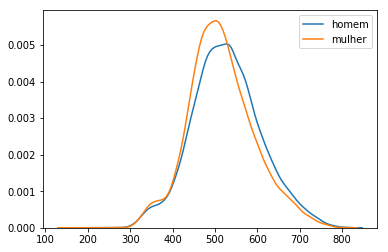

In [5]:
sea.kdeplot(df_densidade.homem.dropna());
sea.kdeplot(df_densidade.mulher.dropna());

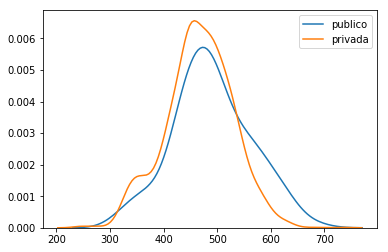

In [6]:
# dados da rede publica não representativa [apenas 133 de 100k]

sea.kdeplot(df_densidade.publico.dropna());
sea.kdeplot(df_densidade.privada.dropna());

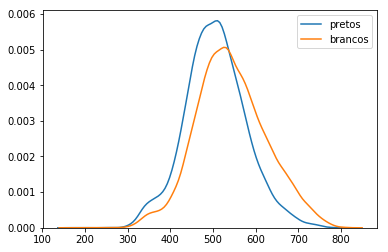

In [7]:
sea.kdeplot(df_densidade.pretos.dropna());
sea.kdeplot(df_densidade.brancos.dropna());

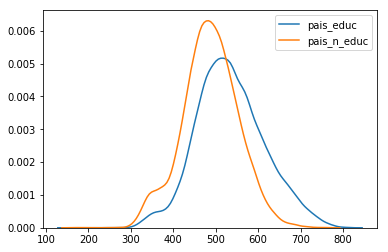

In [8]:
sea.kdeplot(df_densidade.pais_educ.dropna());
sea.kdeplot(df_densidade.pais_n_educ.dropna());

In [9]:
df_densidade.privada.dropna().count()

2293

In [10]:
df_densidade.publico.dropna().count()

133

In [11]:
df_densidade.count()

nota           100000
homem           41900
mulher          58100
publico           133
privada          2293
pretos          12965
brancos         35957
pais_educ       70692
pais_n_educ     29308
dtype: int64

3. Monte uma tabela contendo as estimativas de β e α. Interpretem os resultados (magnitude e significância). Testem diferentes formas de medir o ranking educacional dos pais.

rij =α+βRPi+eij

In [12]:
df_densidade['nota']

0        542.419983
1        540.119995
2        501.140015
3        514.940002
4        511.299988
5        339.479980
6        419.600006
7        479.919983
8        523.599976
9        676.299988
10       537.580017
11       754.320007
12       480.760010
13       621.679993
14       478.820007
15       518.460022
16       467.420013
17       587.739990
18       486.200012
19       510.140015
20       505.420013
21       557.580017
22       428.540009
23       497.040009
24       579.239990
25       465.100006
26       645.659973
27       481.100006
28       518.520020
29       427.320007
            ...    
99970    667.080017
99971    450.440002
99972    515.599976
99973    566.080017
99974    568.400024
99975    483.559998
99976    453.640015
99977    527.840027
99978    542.700012
99979    614.500000
99980    507.360016
99981    418.080017
99982    524.539978
99983    425.000000
99984    452.619995
99985    454.679993
99986    469.260010
99987    682.900024
99988    450.700012


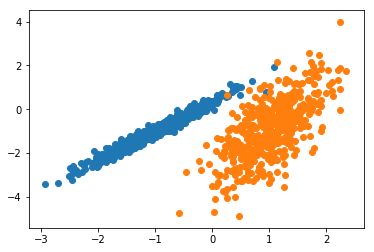

In [13]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [ ]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
# define dataset
#X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
X = np.array(df.nota_enem[1:1000]).reshape(-1,1)
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [27]:
#np.array(df.nota_enem)

array([542.42, 540.12, 501.14, ..., 472.92, 501.16, 479.68], dtype=float32)

In [17]:
where

<function numpy.core.multiarray.where>